In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

109231.tif: 4 bands
109231.tif: 1 bands


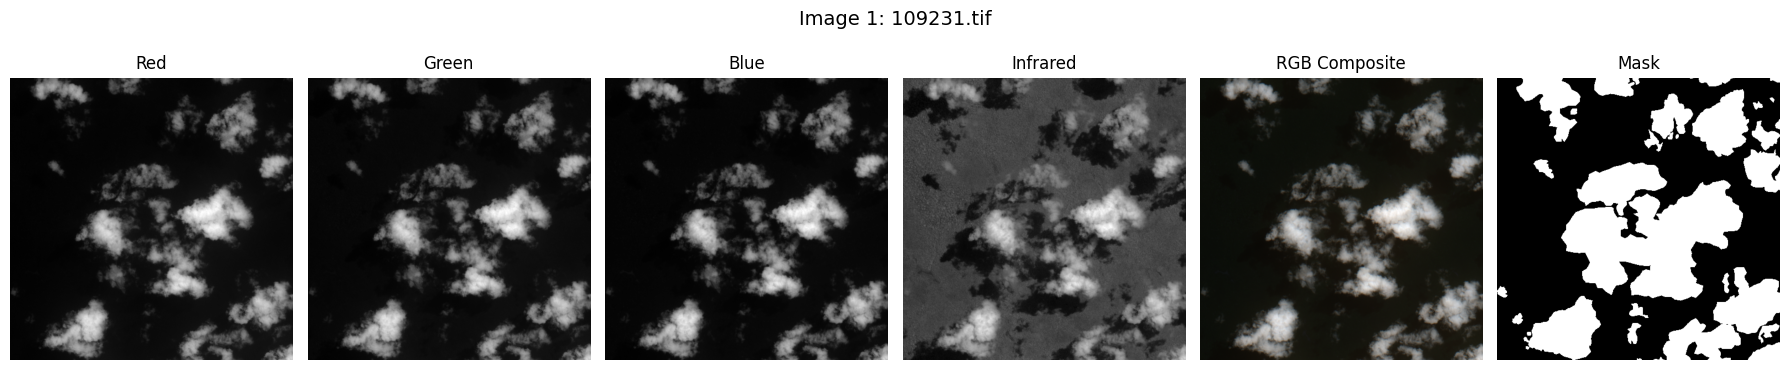

109330.tif: 4 bands
109330.tif: 1 bands


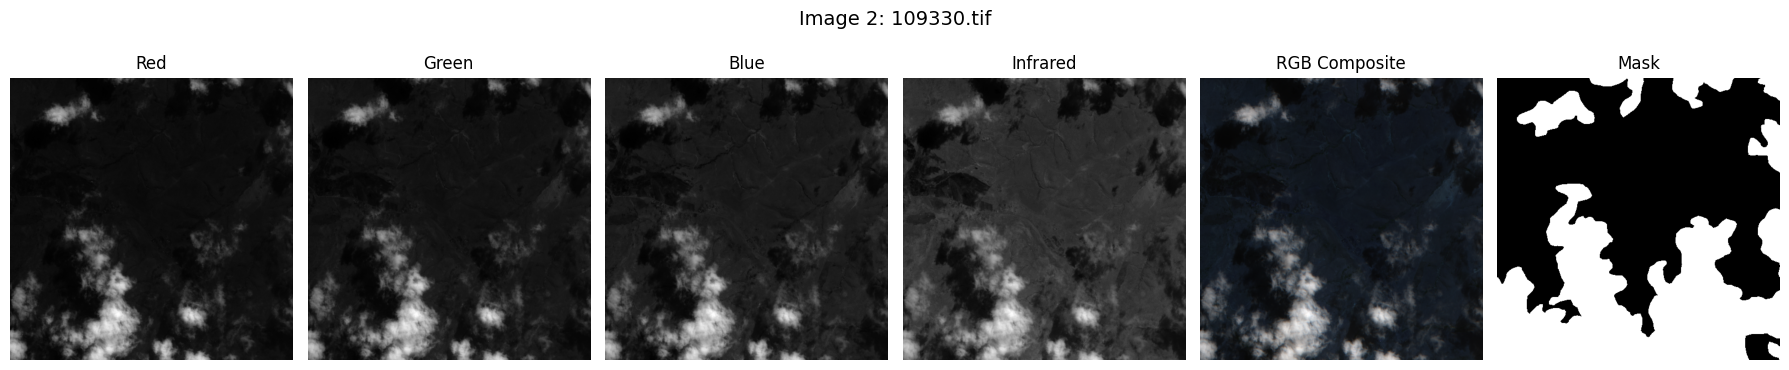

109576.tif: 4 bands
109576.tif: 1 bands


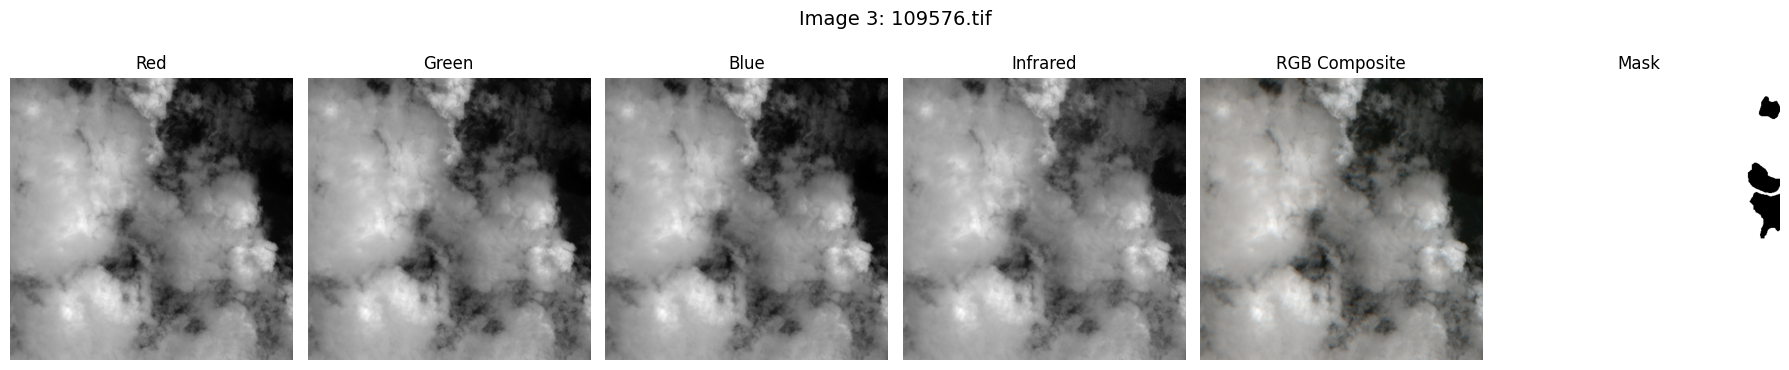

109585.tif: 4 bands
109585.tif: 1 bands


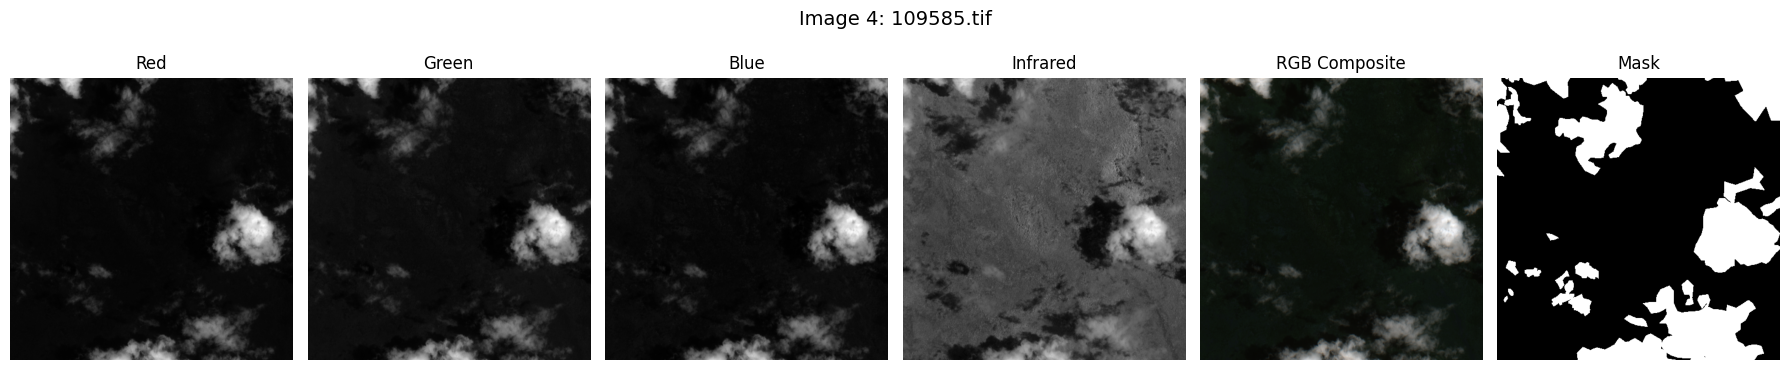

109738.tif: 4 bands
109738.tif: 1 bands


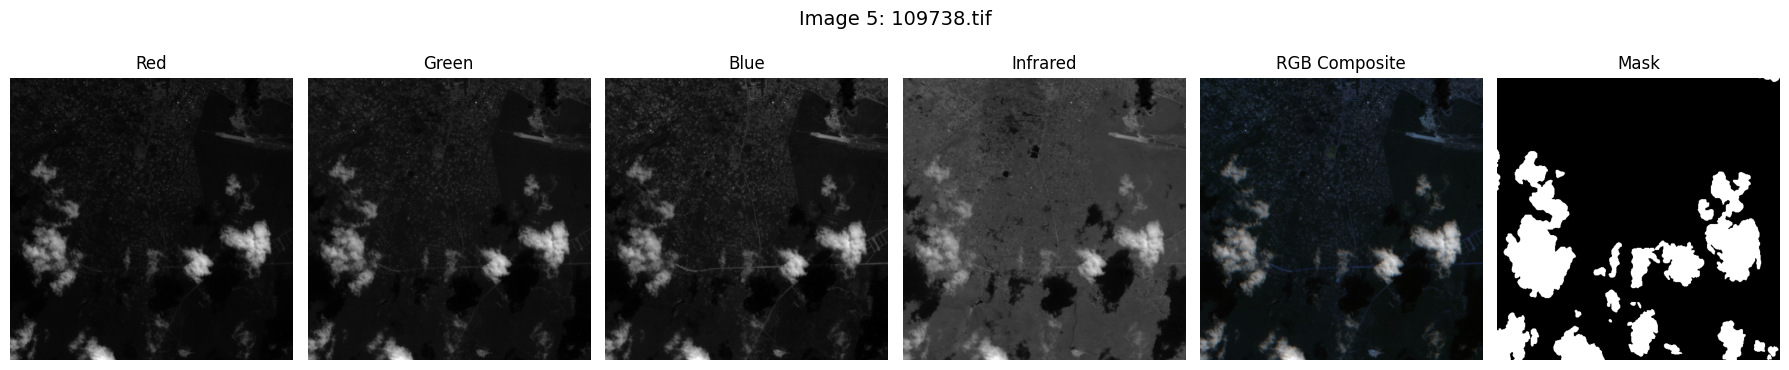

109756.tif: 4 bands
109756.tif: 1 bands


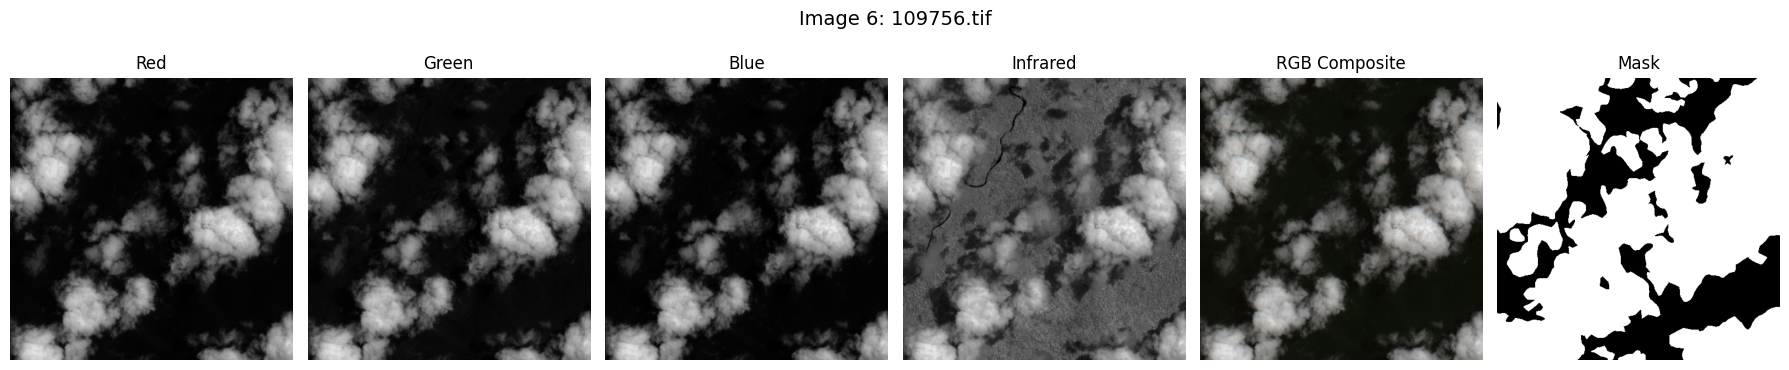

109767.tif: 4 bands
109767.tif: 1 bands


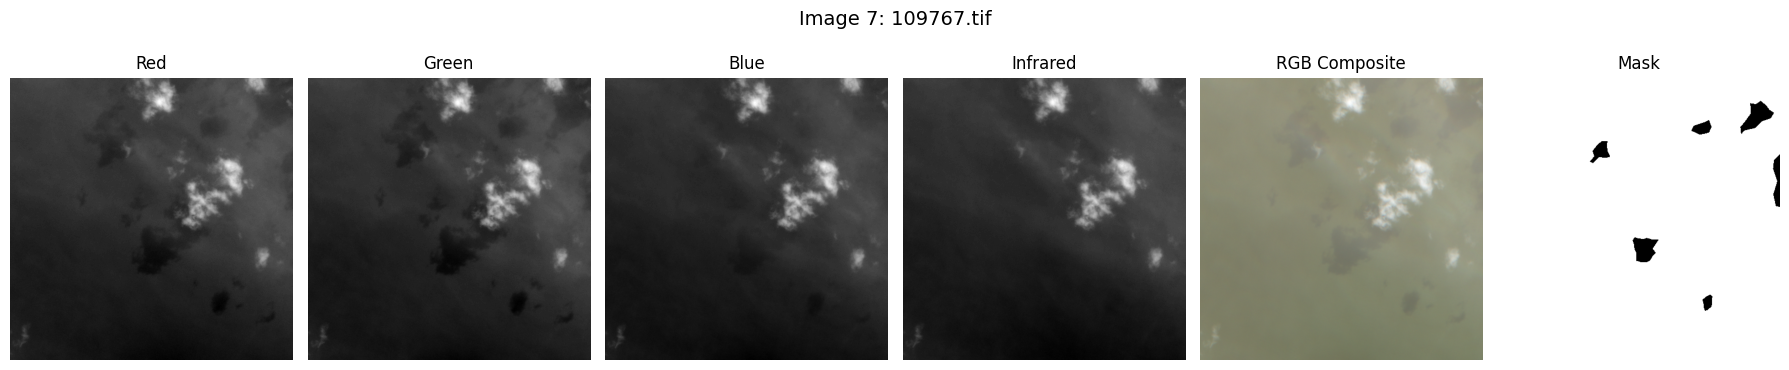

109853.tif: 4 bands
109853.tif: 1 bands


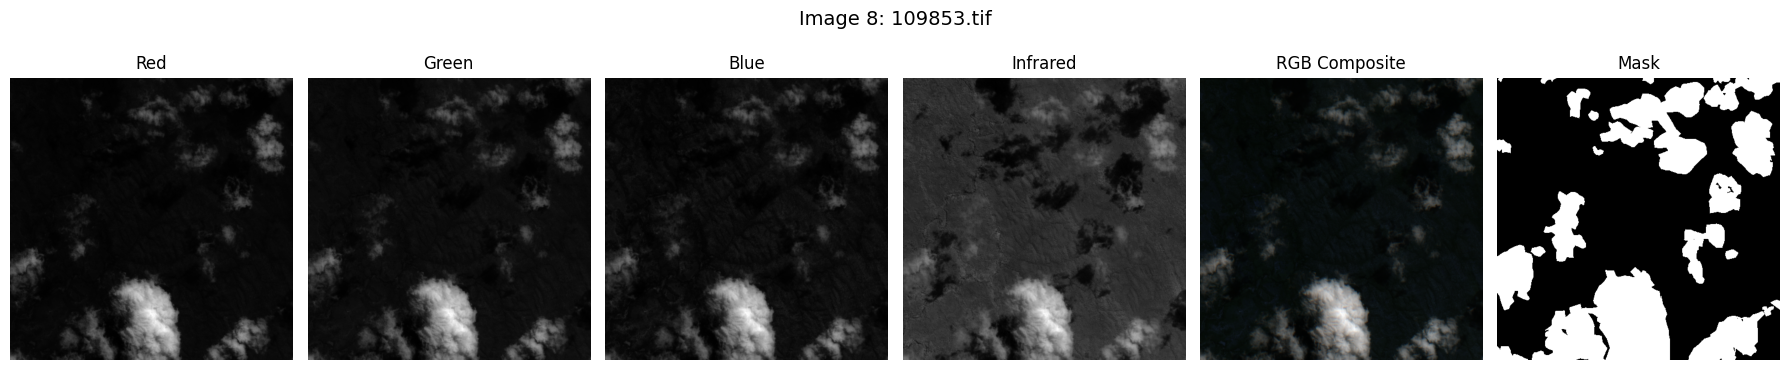

109909.tif: 4 bands
109909.tif: 1 bands


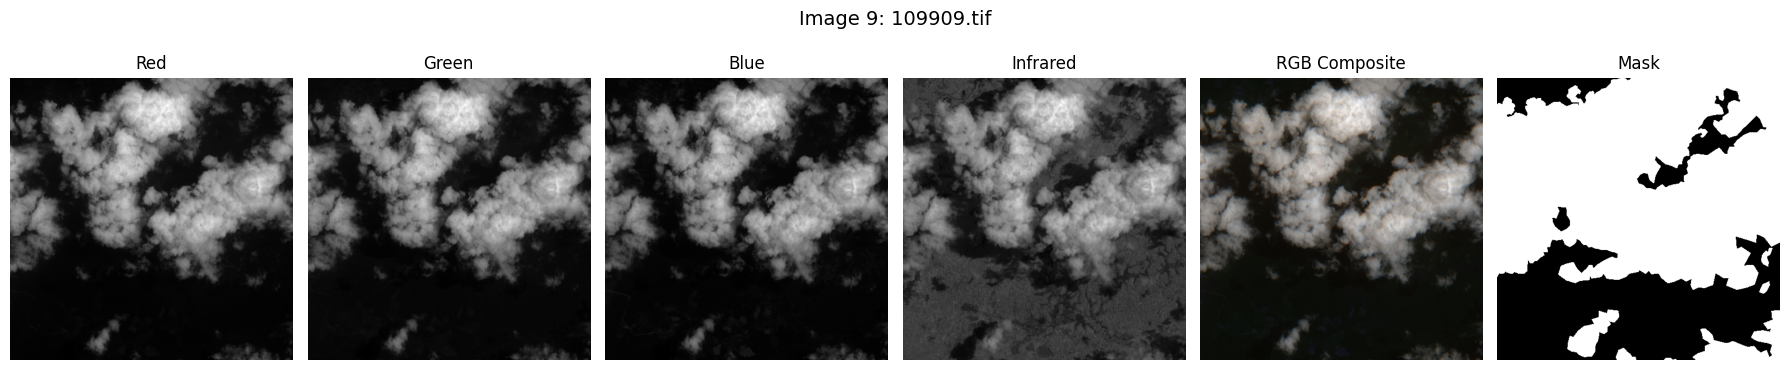

IndexError: list index out of range

In [5]:
# Paths
image_folder = "clean/data"
mask_folder = "clean/masks"

## Load TIFF image using rasterio
def load_tif(path):
    with rasterio.open(path) as src:
        print(f"{os.path.basename(path)}: {src.count} bands")
        return src.read()  # (bands, H, W)

# File lists
image_files = sorted([f for f in os.listdir(image_folder)])
length = len(image_files)
image_files = image_files[length - 10 : length - 1]


# Display loop
for i in range(length):
    image_path = os.path.join(image_folder, image_files[i])
    mask_path = os.path.join(mask_folder, image_files[i])
    
    image = load_tif(image_path)  # (C, H, W)
    mask = load_tif(mask_path)[0]  # (H, W)

    num_channels = image.shape[0]
    assert num_channels >= 4, "Expected at least 4 channels (R, G, B, IR)"
    
    # Normalize each channel individually
    channels = []
    for ch in range(4):
        band = image[ch].astype(np.float32)
        band = band / band.max() if band.max() > 0 else band
        channels.append(band)

    # RGB composite (bands 0, 1, 2)
    rgb = np.stack([channels[0], channels[1], channels[2]], axis=-1)
    rgb = np.clip(rgb, 0, 255)

    # Normalize mask
    mask = mask.astype(np.float32)
    mask = mask / mask.max() if mask.max() > 0 else mask

    # Plot layout: 6 subplots
    plt.figure(figsize=(18, 4))

    titles = ["Red", "Green", "Blue", "Infrared", "RGB Composite", "Mask"]
    images_to_plot = channels[:4] + [rgb, mask]

    for j, img in enumerate(images_to_plot):
        plt.subplot(1, 6, j + 1)
        if j < 4 or j == 5:
            plt.imshow(img, cmap="gray")
        else:
            plt.imshow(img)  # RGB composite
        plt.title(titles[j])
        plt.axis("off")

    plt.suptitle(f"Image {i+1}: {image_files[i]}", fontsize=14)
    plt.tight_layout()
    plt.show()